## Load and Combine Datasets (2020–2024)

Loaded cleaned freight data for the years 2020 to 2024 and combined them into a single DataFrame `df_all` for analysis.


In [49]:
import pandas as pd

# Load and combine
df_2020 = pd.read_csv("cleaned_2020.csv")
df_2021 = pd.read_csv("cleaned_2021.csv")
df_2022 = pd.read_csv("cleaned_2022.csv")
df_2023 = pd.read_csv("cleaned_2023.csv")
df_2024 = pd.read_csv("cleaned_2024.csv")

df_all = pd.concat([df_2020, df_2021, df_2022, df_2023, df_2024], ignore_index=True)


## 1. How did freight movement patterns shift from 2020 to 2024?

Analyzed how freight value and weight changed over time by transport mode using line plots.


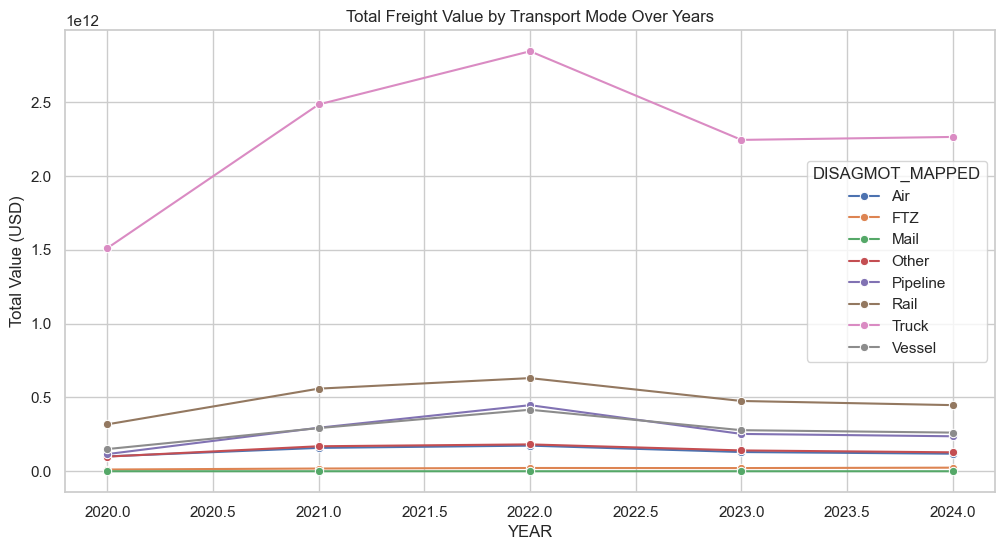

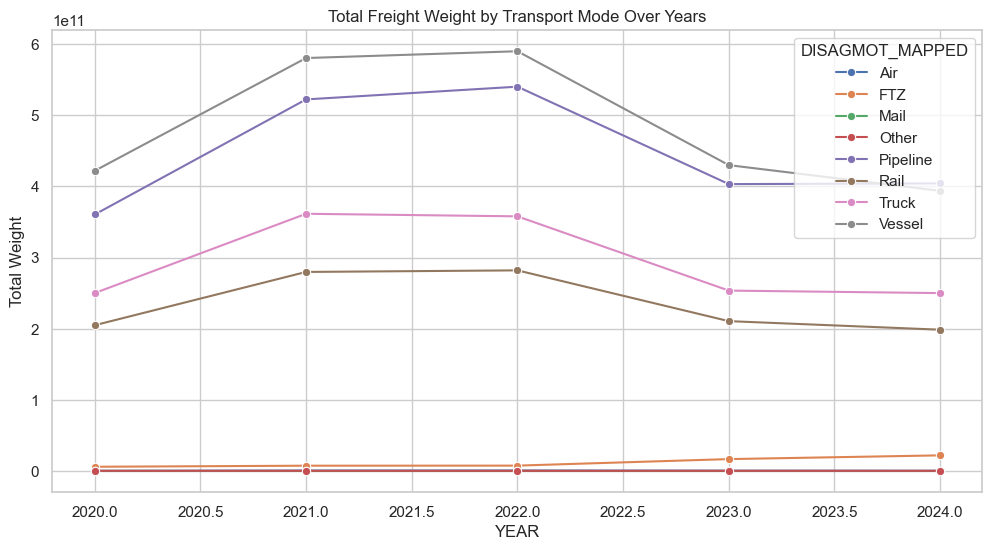

In [50]:
# Group by transport mode and year, then sum VALUE and SHIPWT
freight_by_mode = df_all.groupby(['YEAR', 'DISAGMOT_MAPPED'])[['VALUE', 'SHIPWT']].sum().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

# Value over time by mode
plt.figure(figsize=(12, 6))
sns.lineplot(data=freight_by_mode, x="YEAR", y="VALUE", hue="DISAGMOT_MAPPED", marker='o')

plt.title("Total Freight Value by Transport Mode Over Years")
plt.ylabel("Total Value (USD)")
plt.show()

# Weight over time by mode
plt.figure(figsize=(12, 6))
sns.lineplot(data=freight_by_mode, x="YEAR", y="SHIPWT", hue="DISAGMOT_MAPPED", marker='o')
plt.title("Total Freight Weight by Transport Mode Over Years")
plt.ylabel("Total Weight")
plt.show()

# pivot_data = freight_by_mode.pivot(index='YEAR', columns='DISAGMOT_MAPPED', values='VALUE')
# pivot_data.plot(kind='area', stacked=True, figsize=(12, 6), cmap='tab20')
# plt.title("Freight Value Over Time by Transport Mode (Stacked Area)")
# plt.xlabel("Year")
# plt.ylabel("Total Value (USD)")
# plt.tight_layout()
# plt.show()




## 2. What are the monthly patterns of freight movement?

Explored the monthly trends in freight weight by transport mode.


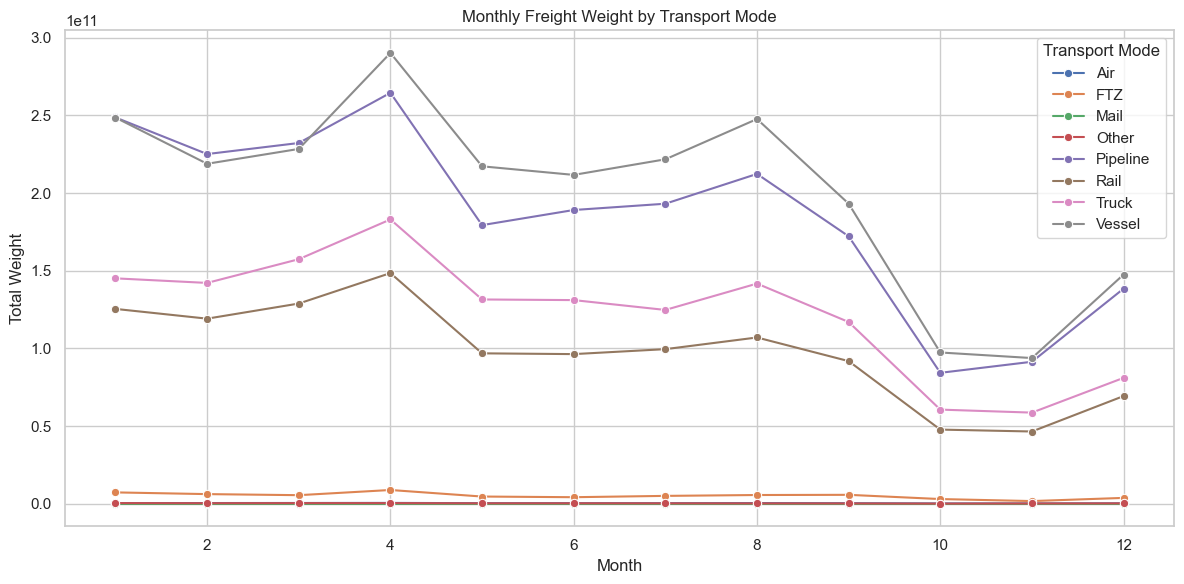

In [51]:
# Group by MONTH and transport mode
monthly_value = df_all.groupby(['MONTH', 'DISAGMOT_MAPPED'])['SHIPWT'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_value, x='MONTH', y='SHIPWT', hue='DISAGMOT_MAPPED', marker='o')
plt.title('Monthly Freight Weight by Transport Mode')
plt.xlabel('Month')
plt.ylabel('Total Weight')
plt.legend(title='Transport Mode')
plt.grid(True)
plt.tight_layout()
plt.show()



## 3. Which modes are more efficient in terms of value per weight?

Calculated a cost-efficiency metric (`VALUE_PER_WEIGHT`) to assess which transport modes deliver higher value per unit weight.


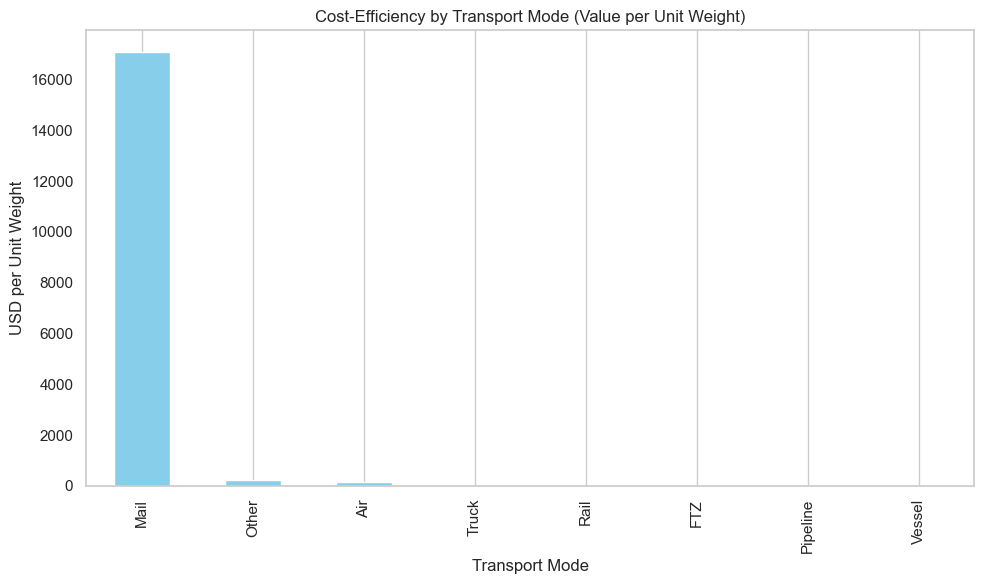

In [52]:
# Group by transport mode and sum VALUE and SHIPWT
efficiency = df_all.groupby('DISAGMOT_MAPPED')[['VALUE', 'SHIPWT']].sum()

# Calculate cost-efficiency
efficiency['VALUE_PER_WEIGHT'] = efficiency['VALUE'] / efficiency['SHIPWT']

# Sort for better visualization
efficiency_sorted = efficiency.sort_values(by='VALUE_PER_WEIGHT', ascending=False)

# Plot
efficiency_sorted['VALUE_PER_WEIGHT'].plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Cost-Efficiency by Transport Mode (Value per Unit Weight)')
plt.ylabel('USD per Unit Weight')
plt.xlabel('Transport Mode')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# import matplotlib.pyplot as plt

# # Sum value by transport mode
# mode_totals = df_all.groupby('DISAGMOT_MAPPED')[['VALUE', 'SHIPWT']].sum().reset_index()

# # Pie chart for VALUE
# plt.figure(figsize=(8, 8))
# plt.pie(mode_totals['VALUE'], labels=mode_totals['DISAGMOT_MAPPED'], 
#         autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
# plt.title("Share of Total Freight VALUE by Transport Mode")
# plt.tight_layout()
# plt.show()



## 4. What are the top commodities by freight value and weight?

We identify the top 10 commodities contributing most to total value and weight from 2020 to 2024.


C:\Users\user\AppData\Local\Temp\ipykernel_13956\2103652740.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_value, x='VALUE', y='COMMODITY2_MAPPED', palette='viridis')


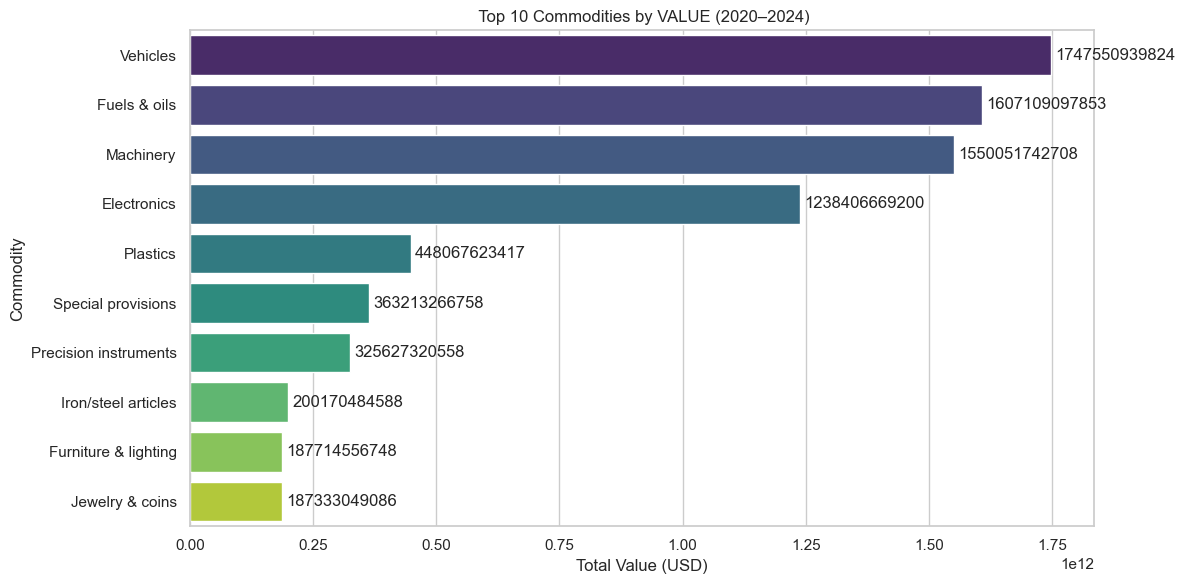

C:\Users\user\AppData\Local\Temp\ipykernel_13956\2103652740.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_weight, x='SHIPWT', y='COMMODITY2_MAPPED', palette='magma')


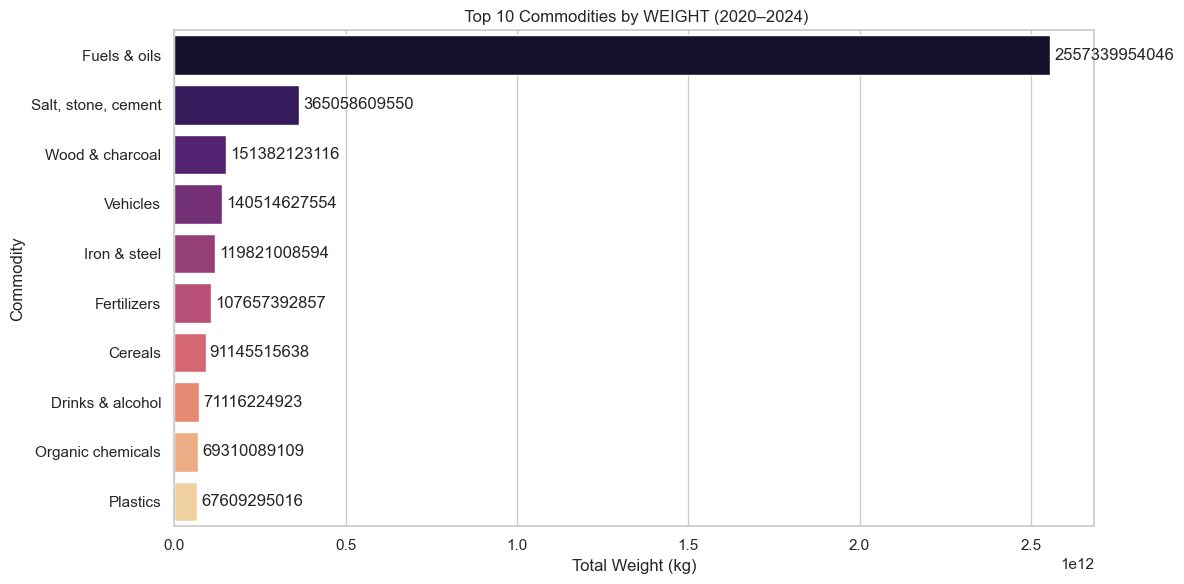

In [53]:
# Remove 'Unknown' values from one column at a time

# Remove rows where USASTATE_MAPPED is 'Unknown'
df_all = df_all[df_all['COMMODITY2_MAPPED'] != 'Unknown']



# Group by commodity and sum value and weight
commodity_summary = df_all.groupby('COMMODITY2_MAPPED')[['VALUE', 'SHIPWT']].sum().reset_index()

# Sort and select top 10
top_value = commodity_summary.sort_values(by='VALUE', ascending=False).head(10)
top_weight = commodity_summary.sort_values(by='SHIPWT', ascending=False).head(10)

# Plot Top 10 Commodities by VALUE
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_value, x='VALUE', y='COMMODITY2_MAPPED', palette='viridis')
# Add labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)
plt.title(' Top 10 Commodities by VALUE (2020–2024)')
plt.xlabel('Total Value (USD)')
plt.ylabel('Commodity')
plt.tight_layout()
plt.show()

# Plot Top 10 Commodities by WEIGHT
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_weight, x='SHIPWT', y='COMMODITY2_MAPPED', palette='magma')
# Add labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)
plt.title(' Top 10 Commodities by WEIGHT (2020–2024)')
plt.xlabel('Total Weight (kg)')
plt.ylabel('Commodity')
plt.tight_layout()
plt.show()



## 5. Which regions contribute most to freight value and weight?

We identify the top 10 regions contributing to freight value and weight, regardless of country. These include U.S. states, Mexican states, and Canadian provinces.


C:\Users\user\AppData\Local\Temp\ipykernel_13956\838572249.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(data=top_value, x='VALUE', y='REGION', palette='crest')


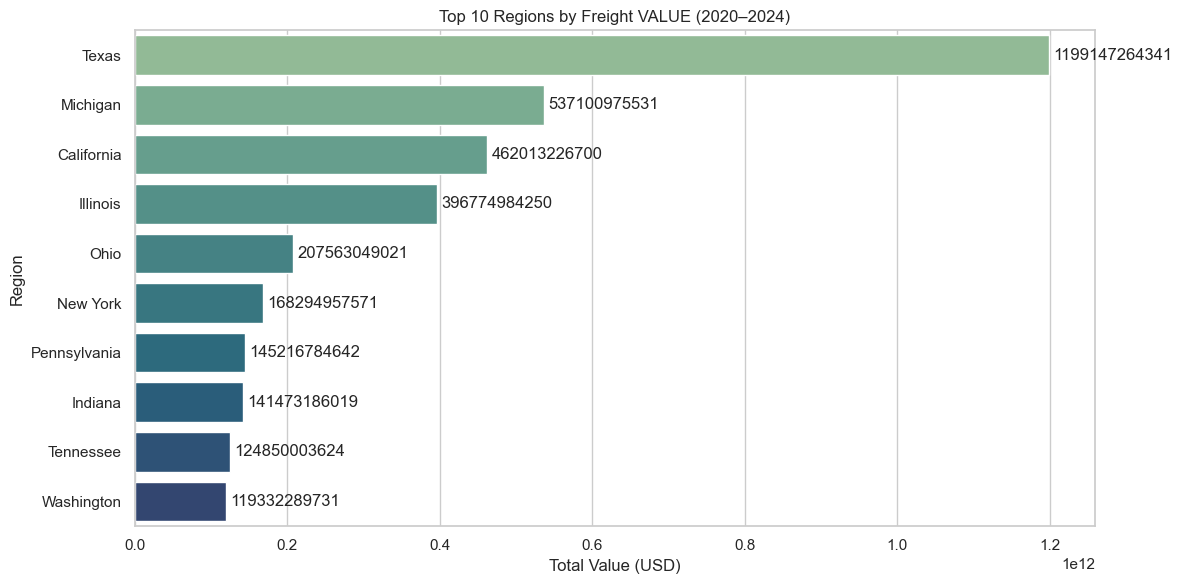

C:\Users\user\AppData\Local\Temp\ipykernel_13956\838572249.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_weight, x='SHIPWT', y='REGION', palette='flare')


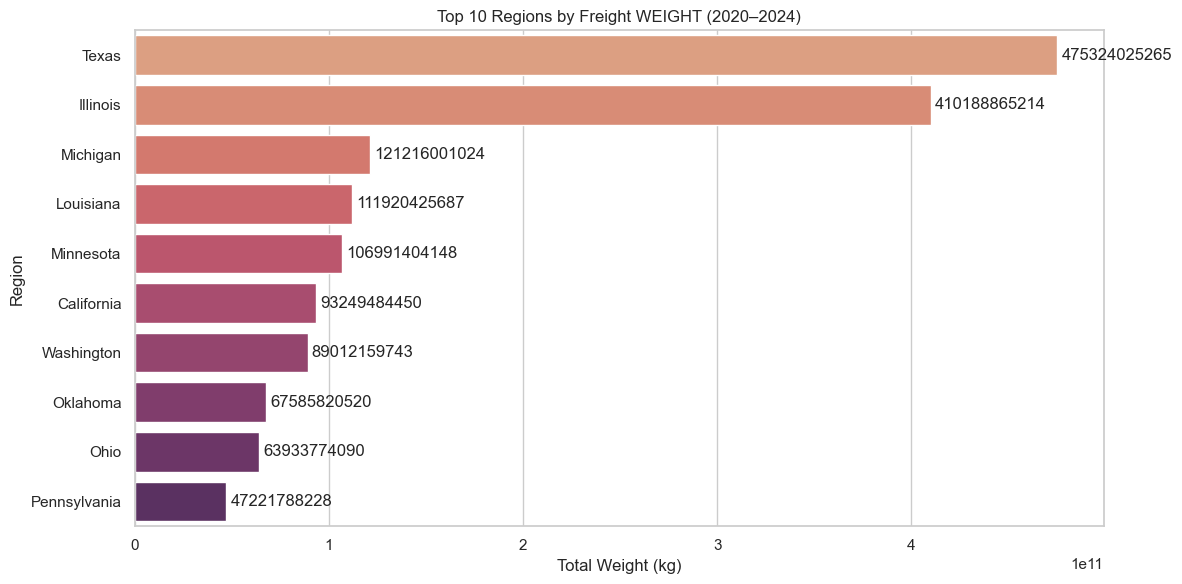

In [54]:
# Combine regions
region_cols = ['USASTATE_MAPPED', 'MEXSTATE_MAPPED', 'CANPROV_MAPPED']
df_all['REGION'] = df_all[region_cols].bfill(axis=1).iloc[:, 0]  # Pick first non-null
# Remove 'Unknown' values from one column at a time

# Remove rows where USASTATE_MAPPED is 'Unknown'
df_all = df_all[df_all['REGION'] != 'Unknown']


# Group by region
region_summary = df_all.groupby('REGION')[['VALUE', 'SHIPWT']].sum().reset_index()

# Top 10 by Value
top_value = region_summary.sort_values(by='VALUE', ascending=False).head(10)
plt.figure(figsize=(12, 6))
ax= sns.barplot(data=top_value, x='VALUE', y='REGION', palette='crest')
# Add labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)
plt.title('Top 10 Regions by Freight VALUE (2020–2024)')
plt.xlabel('Total Value (USD)')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

# Top 10 by Weight
top_weight = region_summary.sort_values(by='SHIPWT', ascending=False).head(10)
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_weight, x='SHIPWT', y='REGION', palette='flare')
# Add labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)
plt.title('Top 10 Regions by Freight WEIGHT (2020–2024)')
plt.xlabel('Total Weight (kg)')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

# !pip install Squarify
# import squarify

# top_regions = region_summary.sort_values(by='VALUE', ascending=False).head(35)
# plt.figure(figsize=(12, 6))
# squarify.plot(sizes=top_regions['VALUE'], label=top_regions['REGION'], alpha=0.8)
# plt.title('Top 15 Regions by Freight Value (Treemap)')
# plt.axis('off')
# plt.tight_layout()
# plt.show()


## How does the freight value vary across U.S. states, Mexican states, and Canadian provinces when analyzed by different trade types?

This question aims to probe into regional differences in freight value and understand how trade type influences these variations.


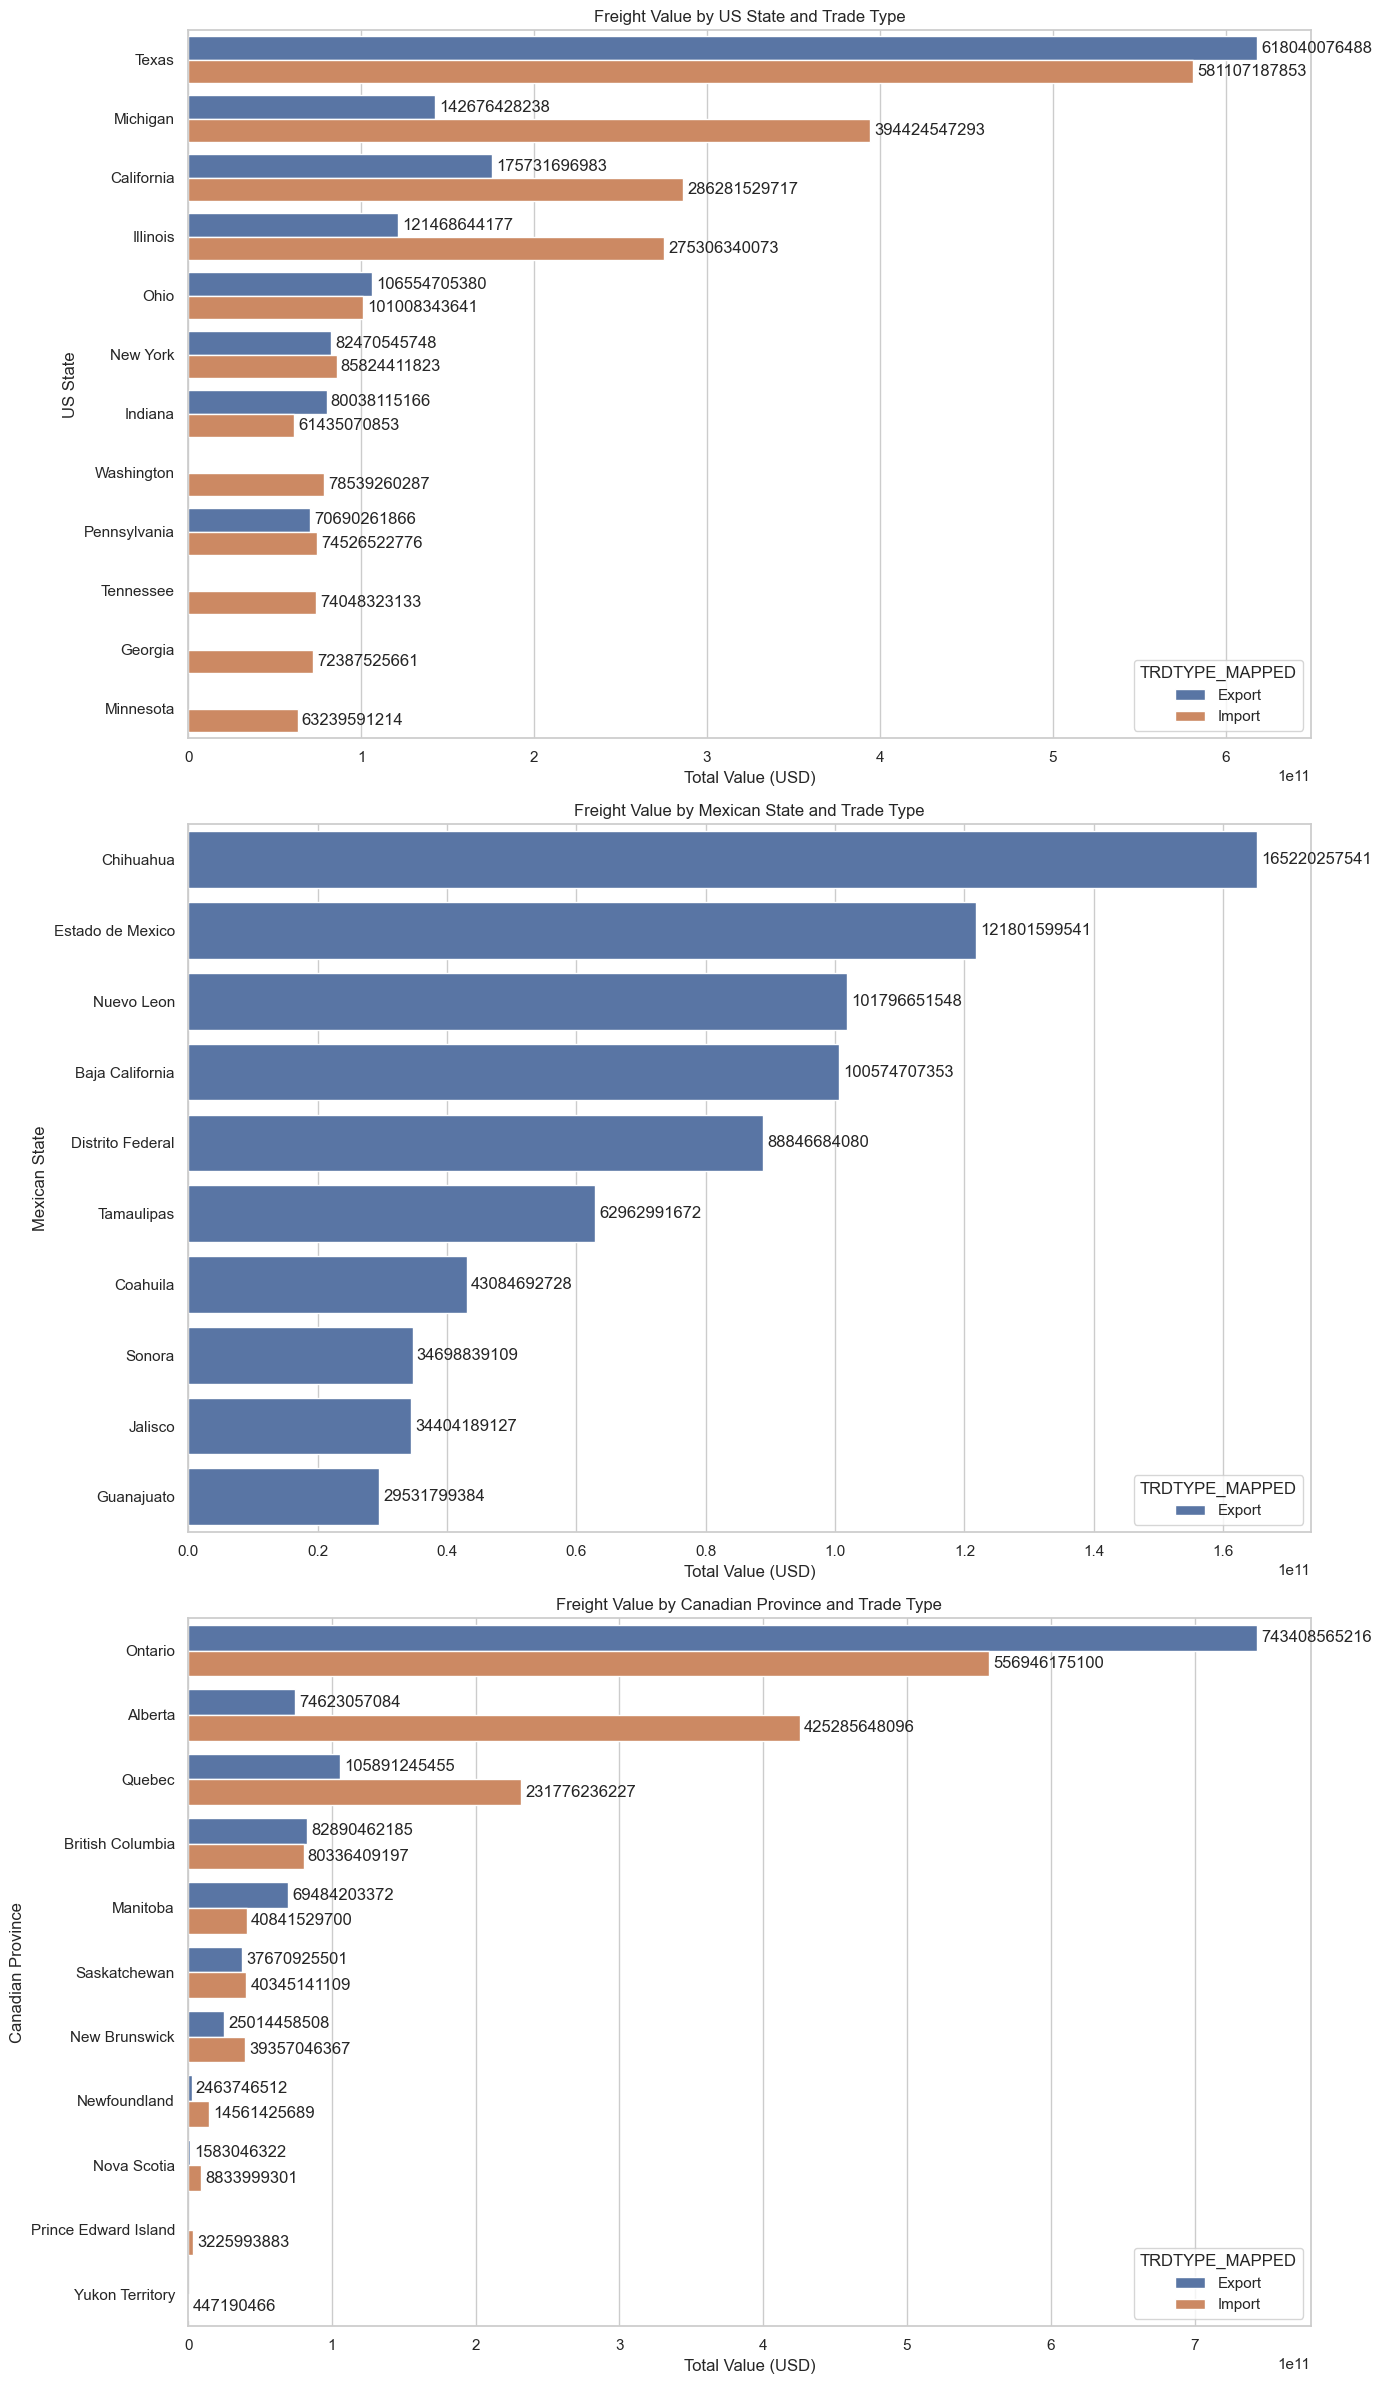

In [55]:
# Remove 'Unknown' values only for plotting
df_filtered_us = df_all[df_all['USASTATE_MAPPED'] != 'Unknown']
df_filtered_mex = df_all[df_all['MEXSTATE_MAPPED'] != 'Unknown']
df_filtered_can = df_all[df_all['CANPROV_MAPPED'] != 'Unknown']

# Grouping by US State and Trade Type
us_exports_imports = df_filtered_us.groupby(['USASTATE_MAPPED', 'TRDTYPE_MAPPED'])[['VALUE', 'SHIPWT']].sum().reset_index()


# Grouping by Mexican State and Trade Type
mex_exports_imports = df_filtered_mex.groupby(['MEXSTATE_MAPPED', 'TRDTYPE_MAPPED'])[['VALUE', 'SHIPWT']].sum().reset_index()


# Grouping by Canadian Province and Trade Type
can_exports_imports = df_filtered_can.groupby(['CANPROV_MAPPED', 'TRDTYPE_MAPPED'])[['VALUE', 'SHIPWT']].sum().reset_index()


# Plotting
fig, axes = plt.subplots(3, 1, figsize=(14, 24))
sns.set(style="whitegrid")

# US plot
ax = sns.barplot(data=us_exports_imports.sort_values(by="VALUE", ascending=False).head(20), 
            x="VALUE", y="USASTATE_MAPPED", hue="TRDTYPE_MAPPED", ax=axes[0])
# Add labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)
axes[0].set_title("Freight Value by US State and Trade Type")
axes[0].set_xlabel("Total Value (USD)")
axes[0].set_ylabel("US State")

# Mexico plot
ax =sns.barplot(data=mex_exports_imports.sort_values(by="VALUE", ascending=False).head(10), 
            x="VALUE", y="MEXSTATE_MAPPED", hue="TRDTYPE_MAPPED", ax=axes[1])
# Add labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)
axes[1].set_title("Freight Value by Mexican State and Trade Type")
axes[1].set_xlabel("Total Value (USD)")
axes[1].set_ylabel("Mexican State")

# Canada plot
ax = sns.barplot(data=can_exports_imports.sort_values(by="VALUE", ascending=False).head(20), 
            x="VALUE", y="CANPROV_MAPPED", hue="TRDTYPE_MAPPED", ax=axes[2])
# Add labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)
axes[2].set_title("Freight Value by Canadian Province and Trade Type")
axes[2].set_xlabel("Total Value (USD)")
axes[2].set_ylabel("Canadian Province")

plt.tight_layout()
plt.show()

# Filter Canada
canada_trade = df_all[df_all['COUNTRY_MAPPED'] == 'Canada']

# Group by trade type
trade_counts = canada_trade.groupby('TRDTYPE_MAPPED')['VALUE'].sum().reset_index()


C:\Users\user\AppData\Local\Temp\ipykernel_13956\4011399632.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=route_counts.head(20), x='count', y='route_description', palette='tab20c')


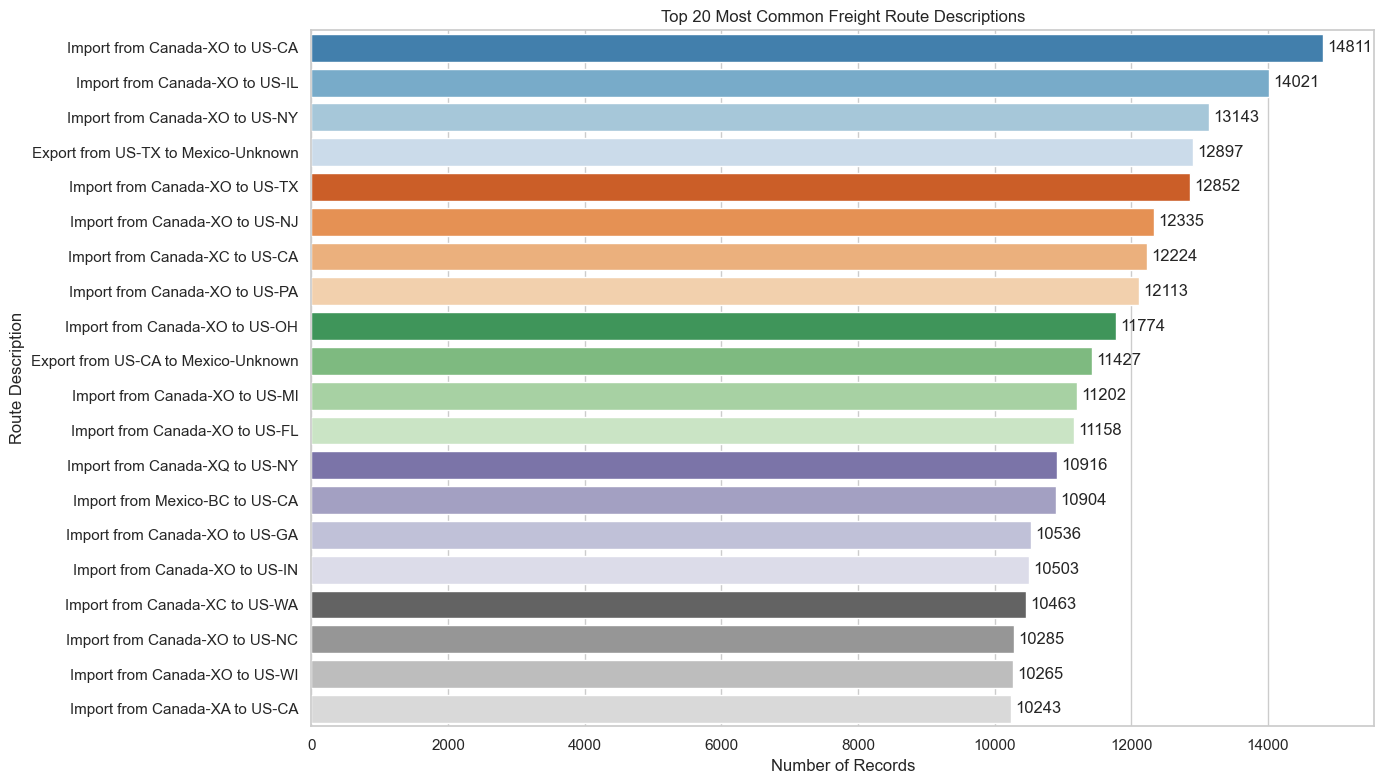

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count the most common routes
route_counts = df_all['route_description'].value_counts().reset_index()
route_counts.columns = ['route_description', 'count']

# Plot top 20
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=route_counts.head(20), x='count', y='route_description', palette='tab20c')
# Add labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)
plt.title('Top 20 Most Common Freight Route Descriptions')
plt.xlabel('Number of Records')
plt.ylabel('Route Description')
plt.tight_layout()
plt.show()


##  7. What are the most common freight route descriptions used in cross-border transportation with Canada and Mexico from 2020 to 2024?

These charts show the top 15 most frequently used route descriptions for freight movements to/from **Canada** and **Mexico** between 2020 and 2024.


C:\Users\user\AppData\Local\Temp\ipykernel_13956\1513300118.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=canada_routes, x='count', y='route_description', palette='Blues_d')
C:\Users\user\AppData\Local\Temp\ipykernel_13956\1513300118.py:22: UserWarning: Glyph 127464 (\N{REGIONAL INDICATOR SYMBOL LETTER C}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_13956\1513300118.py:22: UserWarning: Glyph 127462 (\N{REGIONAL INDICATOR SYMBOL LETTER A}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127464 (\N{REGIONAL INDICATOR SYMBOL LETTER C}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\I

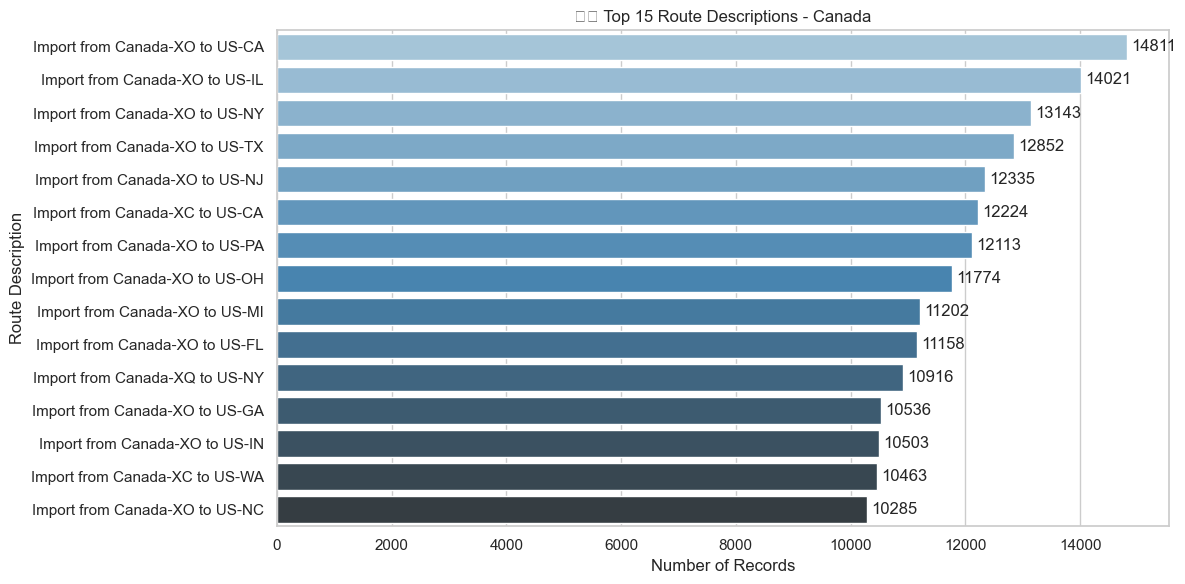

C:\Users\user\AppData\Local\Temp\ipykernel_13956\1513300118.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=mexico_routes, x='count', y='route_description', palette='Greens_d')


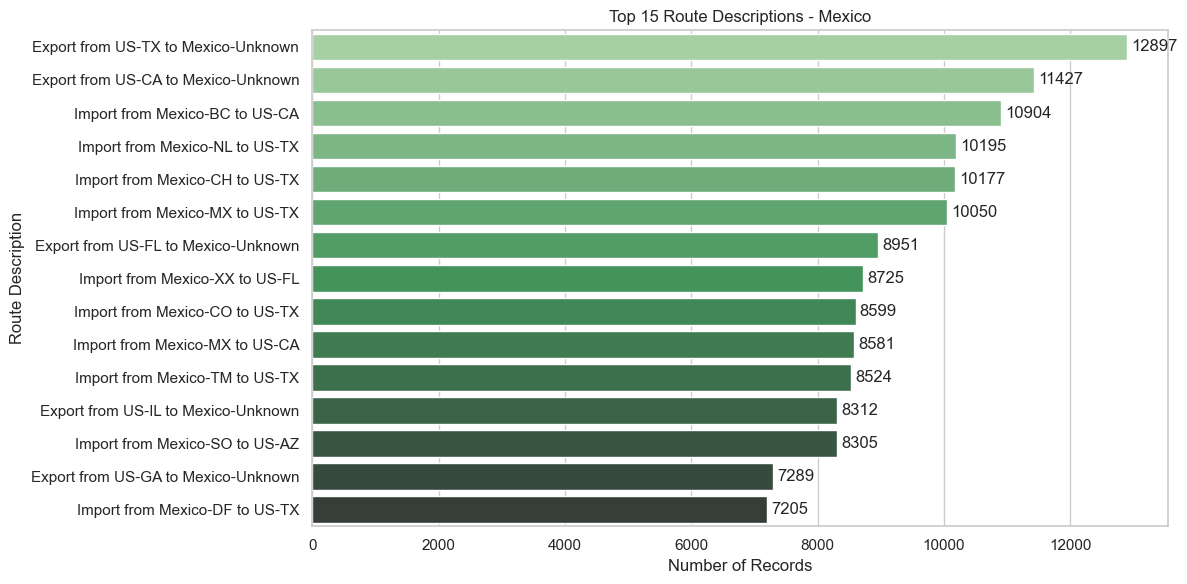

In [57]:

# Drop missing route descriptions
df_routes = df_all.dropna(subset=['route_description', 'COUNTRY_MAPPED'])

# --- Top 15 Routes for Canada ---
canada_routes = (
    df_routes[df_routes['COUNTRY_MAPPED'] == 'Canada']
    .route_description
    .value_counts()
    .head(15)
    .reset_index()
)
canada_routes.columns = ['route_description', 'count']

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=canada_routes, x='count', y='route_description', palette='Blues_d')
# Add labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)
plt.title("🇨🇦 Top 15 Route Descriptions - Canada")
plt.xlabel("Number of Records")
plt.ylabel("Route Description")
plt.tight_layout()
plt.show()


# --- Top 15 Routes for Mexico ---
mexico_routes = (
    df_routes[df_routes['COUNTRY_MAPPED'] == 'Mexico']
    .route_description
    .value_counts()
    .head(15)
    .reset_index()
)
mexico_routes.columns = ['route_description', 'count']

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=mexico_routes, x='count', y='route_description', palette='Greens_d')
# Add labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)
plt.title("Top 15 Route Descriptions - Mexico")
plt.xlabel("Number of Records")
plt.ylabel("Route Description")
plt.tight_layout()
plt.show()

# Filter Canada
canada_trade = df_all[df_all['COUNTRY_MAPPED'] == 'Canada']

# Group by trade type
trade_counts = canada_trade.groupby('TRDTYPE_MAPPED')['VALUE'].sum().reset_index()

# # Pie chart
# plt.figure(figsize=(6, 6))
# plt.pie(trade_counts['VALUE'], labels=trade_counts['TRDTYPE_MAPPED'], 
#         autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
# plt.title("Canada: Share of Exports vs Imports (by Value)")
# plt.tight_layout()
# plt.show()
